# Importing Packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data


# Loading Data

In [10]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# visualizing the data

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


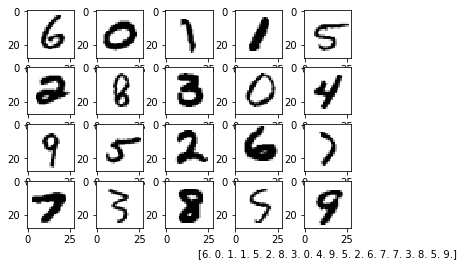

In [3]:
sn = 1000
amount = 20
lines = 4
columns = 5
image = np.zeros((amount, 28, 28))
number = np.zeros(amount)

for i in range(amount):
    image[i] = mnist.train.images[sn + i].reshape(28, 28)
    label = mnist.train.labels[sn + i]
    number[i] = int(np.where(label == 1)[0])
    

fig = plt.figure()
for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(image[i], cmap='binary')
  

plt.xlabel(number)
plt.show()

### outlinig the model

In [4]:
input_size=784
output_size=10
hidden_layer_size=100

tf.reset_default_graph()

In [5]:
inputs=tf.placeholder(tf.float32,[None,input_size])
targets=tf.placeholder(tf.float32,[None,output_size])

weights_1=tf.get_variable("weights_1",[input_size,hidden_layer_size])
biases_1=tf.get_variable("biases_1",[hidden_layer_size])

outputs_1=tf.nn.relu(tf.matmul(inputs,weights_1)+biases_1)

weights_2=tf.get_variable("weights_2",[hidden_layer_size,hidden_layer_size])
biases_2=tf.get_variable("biases_2",[hidden_layer_size])

outputs_2=tf.nn.relu(tf.matmul(outputs_1,weights_2)+biases_2)


weights_3=tf.get_variable("weights_3",[hidden_layer_size,output_size])
biases_3=tf.get_variable("biases_3",[output_size])

outputs=tf.matmul(outputs_2,weights_3)+biases_3   

W1030 16:16:52.467621   520 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Selecting the Model/Algorithm And Optimizer 

In [6]:
loss=tf.nn.softmax_cross_entropy_with_logits(logits=outputs,labels=targets)
mean_loss=tf.reduce_mean(loss)
optimize=tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

out_equals_target=tf.equal(tf.argmax(outputs,1),tf.argmax(targets,1))

accuracy=tf.reduce_mean(tf.cast(out_equals_target,tf.float32))

W1030 16:16:52.515638   520 deprecation.py:323] From <ipython-input-6-b9aa6d76d2a8>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Begining the Session

In [7]:
sess= tf.InteractiveSession()

initializer=tf.global_variables_initializer()
sess.run(initializer)

# Initializing HyperParameters

In [8]:
batch_size=100
batches_number=mnist.train._num_examples//batch_size

max_epochs=15

prev_validation_loss=9999999

# Training the Model with Early Stopping Criterion

In [9]:
for epoch_counter in range(max_epochs):
    curr_epoch_loss=0
    for batch_counter in range(batches_number):
        input_batch,target_batch=mnist.train.next_batch(batch_size)
        _,batch_loss=sess.run([optimize,mean_loss],feed_dict={inputs:input_batch,targets:target_batch})
        curr_epoch_loss+=batch_loss
    curr_epoch_loss/=batches_number
    input_batch,target_batch=mnist.validation.next_batch(mnist.validation._num_examples)
    validation_loss,validation_accuracy=sess.run([mean_loss,accuracy],feed_dict={inputs:input_batch,targets:target_batch})
    
    print("epoch "+str(epoch_counter+1)+
          '.Training loss: '+'{0:.3f}'.format(curr_epoch_loss)+
          '.Validation loss: '+'{0:.3f}'.format(validation_loss)+
          '.Training Accuracy: '+'{0:.3f}'.format(validation_accuracy*100)+'%')
    if(validation_loss>prev_validation_loss):
        break
    prev_validation_loss=validation_loss
    
    print('End of Training')

epoch 1.Training loss: 0.326.Validation loss: 0.154.Training Accuracy: 95.840%
End of Training
epoch 2.Training loss: 0.133.Validation loss: 0.114.Training Accuracy: 96.820%
End of Training
epoch 3.Training loss: 0.095.Validation loss: 0.099.Training Accuracy: 97.020%
End of Training
epoch 4.Training loss: 0.073.Validation loss: 0.082.Training Accuracy: 97.380%
End of Training
epoch 5.Training loss: 0.057.Validation loss: 0.087.Training Accuracy: 97.540%
